In [ ]:
from pandas_datareader import data, wb

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [ ]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [ ]:
# Bank of America
BAC = data.DataReader('BAC','yahoo',start,end)

# CitiGroup
C = data.DataReader('C','yahoo',start,end)

# Goldman Sachs
GS = data.DataReader('GS','yahoo',start,end)

# JPMorgan Chase
JPM = data.DataReader('JPM','yahoo',start,end)

# Morgan Stanley
MS = data.DataReader('MS','yahoo',start,end)

# Wells Fargo
WFC = data.DataReader('WFC','yahoo',start,end)

In [16]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.054218
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.681938
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.726604
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.674480
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.696808


In [20]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [21]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [25]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.140598  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.166069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.267979  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.306194  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.701099  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [26]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [27]:
returns = pd.DataFrame()

In [28]:
for tick in tickers:
    returns[tick +' Return'] = bank_stocks[tick]['Close'].pct_change()

In [30]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


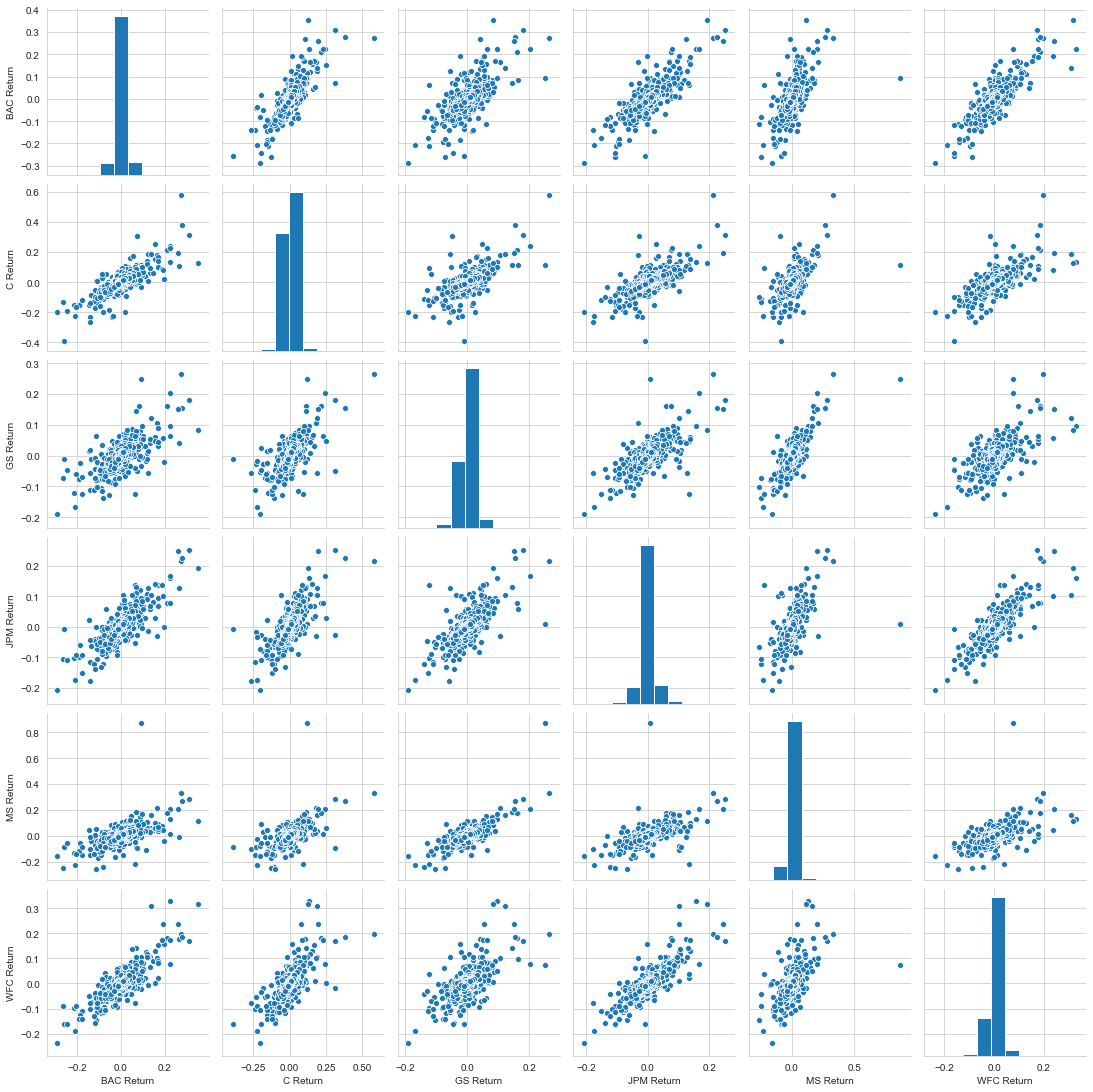

In [80]:
sns.set_style('whitegrid')
sns.pairplot(data=returns[1:])

In [36]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [37]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [38]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

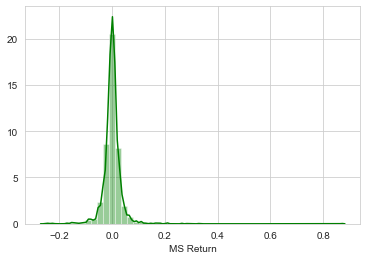

In [81]:
sns.distplot(returns['MS Return'],color='green',bins=50)

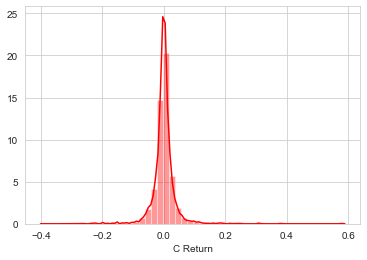

In [82]:
sns.distplot(returns['C Return'],color='red',bins=50)

In [86]:
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [84]:
init_notebook_mode(connected=True)
cf.go_offline()

In [85]:
%matplotlib inline

In [92]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


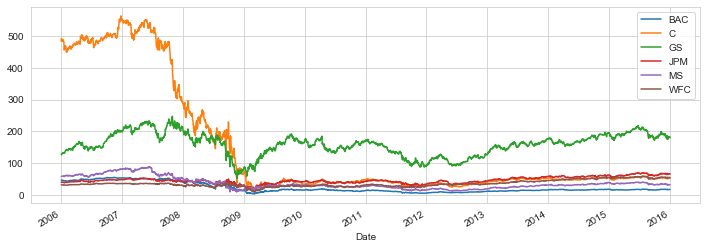

In [105]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))

plt.legend()

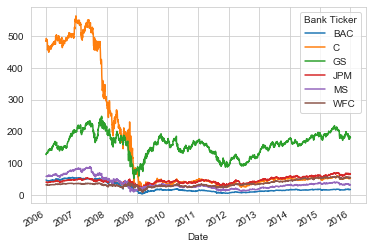

In [106]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot()

In [107]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).iplot()

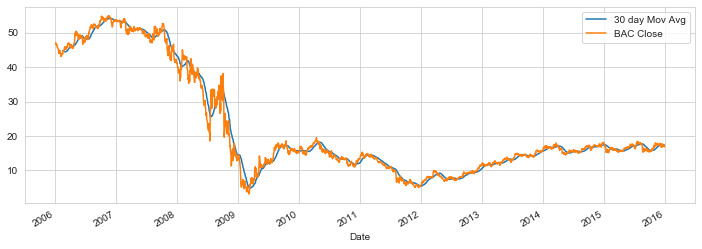

In [110]:
plt.figure(figsize=(12,4))
BAC['Close'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].plot(label='BAC Close')

plt.legend()

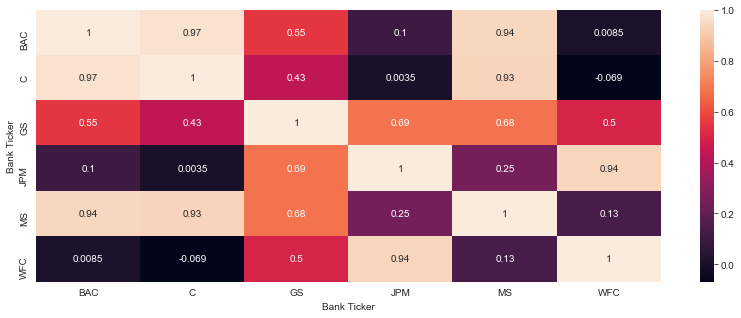

In [117]:
plt.figure(figsize=(14,5))
sns.heatmap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

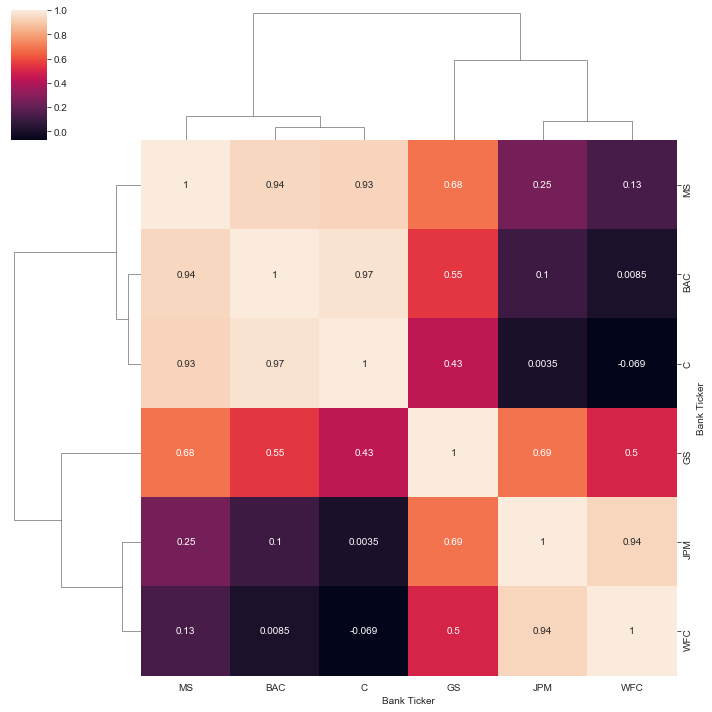

In [115]:
sns.clustermap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

In [118]:
close_corr = bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr()

In [123]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [125]:
BAC[['Open','High','Low','Close']].iplot(kind='candle')

In [130]:
MS['Close'].ta_plot(study='sma')

In [132]:
BAC['Close'].ta_plot(study='boll')

In [1]:
bank_stocks.xs(key='Volume',level='Stock Info',axis=1).iplot(kind='surface')

NameError: name 'bank_stocks' is not defined